# Decision Tree
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Fundations](#mathematical-fundations)
    - [Classification and Regression Trees (CART)](#classification-and-regression-trees-cart)
3. [Learning Algorithm](#learning-algorithm)
    - [Use DecisionTreeClassifier() class provided by Scikit-Learn in wine dataset](#use-decisiontreeclassifier-class-provided-by-scikit-learn-in-wine-dataset)
    - [Use DecisionTreeRegressor() class provided by Scikit-Learn in california_housing dataset](#use-decisiontreeregressor-class-provided-by-scikit-learn-in-california_housing-dataset)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)

## Introduction
The Decision Tree is a fundamental machine learning model that uses a tree-like structure for both classification and regression tasks. It's an interpretable, non-parametric model, meaning it makes no assumptions about the underlying data distribution.

A Decision Tree consists of the following components:

- **Node**: In each node, a decision is made, to split the data or to stop. A node that splits the data is called a decision node. Decision nodes are used to make any decision.
    - **Root**: The topmost node in a decision tree. It represents the entire sample and this further gets divided into two or more homogeneous sets.
    - **Parent**: The node which gets divided into sub-nodes is known as the parent node.
    - **Children**: Nodes that are split from the same node are called children for that node.
- **Branch**: A branch represents the outcome of a test and connects nodes.
- **Leaf**: Terminal nodes or leaves represent the decision/result. It doesn't contain any further branches.


There are several popular algorithms to build a decision tree, and they differ on how they choose where to split the data. Here are a few of them:

1. **ID3 (Iterative Dichotomiser 3)**: This algorithm uses Entropy and Information Gain to construct a decision tree.

2. **C4.5**: It's an extension of ID3 that adjusts the way it handles the attributes of continuous and missing values.

3. **CART (Classification and Regression Trees)**: As the name suggests, it supports both classification and regression problems. It uses the Gini Index as a metric.

4. **CHAID (Chi-squared Automatic Interaction Detection)**: Performs multi-level splits when computing classification trees.

Here is a comparison of the above algorithms:

| Algorithm | Categorical data | Numeric data | Missing values | Metric | Overfitting prevention | Binary Tree | Other features |
|-----------|------------------|--------------|----------------|--------|-------------------------|-------------|----------------|
| ID3       | Yes              | No           | No             | Information Gain | No              | No | - |
| C4.5      | Yes              | Yes          | Yes            | Gain Ratio       | Yes (Pruning)    | Yes | Extension of ID3 |
| CART      | Yes              | Yes          | Yes            | Gini Index       | Yes (Tree size control) | Yes | Can do both Classification and Regression |
| CHAID     | Yes              | Yes          | Yes            | Chi-square Test  | No              | No | Can do multi-level splits |


Here we will focus on the CART algorithm.

## Mathematical Fundations

Decision trees use various mathematical concepts to determine the best splits at each node. Some of the most common criteria for measuring the quality of a split are:

- **Gini impurity**: Measures the impurity or diversity of the samples in a node. It is used in the CART algorithm to measure the impurity of a node. The Gini impurity is 0 when all the training instances in a node belong to a single class. The Gini impurity for the $i^{th}$ node is given by:
    $$
    G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
    $$
    Where: $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node.

- **Information gain (Entropy reduction)**: Measures the reduction in entropy (disorder) after splitting the node. It is used in the ID3, C4.5, and C5.0 algorithms to measure the homogeneity of a node. The entropy for the $i^{th}$ node is given by:
    $$
    H_i = - \sum_{{k=1}}^{n} p_{i,k} \log_2(p_{i,k})
    $$
    Note: the sum is over all nonempty classes ($p_{i,k}≠0$) of the i-th node.
    
- **Variance reduction**: Measures the reduction in variance for regression tasks. For example, the variance for the $i^{th}$ node is given by (mean squared error, MSE) :
    $$
    MSE_i = \sigma_i^2 = \frac{1}{m_i} \sum_{k=1}^{m_i} (y_{i,k} - \bar{y}_i)^2
    $$
    Where: 
    
    - $m_i$ is the number of training instances in the $i^{th}$ node
    - $y_{i,k}$ is the target value of the $k^{th}$ instance in the $i^{th}$ node, 
    - $\bar{y}_i$ is the mean target value of the training instances in the $i^{th}$ node.

Here is a table to compare Gini impurity and Entropy:

| Criteria     | Gini Impurity | Entropy   |
|--------------|---------------|-----------|
| **Bias** | less biased, and will split the nodes such that they are more balanced. | more biased towards multilevel attributes. |
| **Speed** | slightly faster to compute as it doesn't involve logarithmic functions. | involves the computation of logarithmic functions, which can be computationally expensive. |
| **Outcome** | tends to isolate the most frequent class in its own branch of the tree. | tends to produce slightly more balanced trees. |


### Classification and Regression Trees (CART)
Scikit-Learn uses CART algorithm to train Decision Trees. 

For classification tasks, [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class uses the Gini impurity by default abd the cost function is given by below equation. You can set the `criterion` hyperparameter to `"entropy"` to use the information gain instead.

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
$$

Where:
- $G_{\text{left}}$/$G_{\text{right}}$ measures the impurity of the left/right subset
- $m_{\text{left}}$/$m_{\text{right}}$ is the number of instances in the left/right subset
- $m$ is the total number of instances.


For regression tasks, [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class uses the MSE cost function, which is given by below equation:

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} MSE_{\text{left}} + \frac{m_{\text{right}}}{m} MSE_{\text{right}}
$$

## Learning Algorithm

The learning algorithm for decision trees involves recursively partitioning the data into subsets based on the values of the input features. The main steps are:

1. Start with the entire dataset at the root node.
2. Select the best attribute to split the data based on a splitting criterion (e.g., Gini impurity, information gain, or variance reduction).
3. Create child nodes for each value of the selected attribute.
4. Recursively apply steps 2 and 3 to each child node until a stopping criterion is met (e.g., maximum tree depth, minimum samples per leaf, or no further improvement in the splitting criterion).


### Use DecisionTreeClassifier() class provided by Scikit-Learn in wine dataset

The wine dataset is a classic machine learning dataset consisting of attributes of different wines. It has a total of 178 instances, with 13 features each. The dataset is typically used for classification tasks, where the goal is to predict the class of the wine based on its features. There are three classes in the dataset, corresponding to three different types of wine. The wine dataset is often used for teaching and demonstrating machine learning algorithms due to its relatively small size and well-defined class structure.

To simplify the task, we will use only two features from the dataset: alcohol and malic acid to predict two classes from the dataset: class 1 and non-class 1. 

The `DecisionTreeClassifier` class is provided by Scikit-Learn with the default Gini impurity measure to evaluate the quality of a split. We will also set the `max_depth` hyperparameter to 2 to limit the depth of the decision tree to 2 levels. This will allow us to visualize the decision tree and its splits more easily.

In [158]:
# Import the required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X.shape:  (178, 13) y.shape:  (178,)
feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float

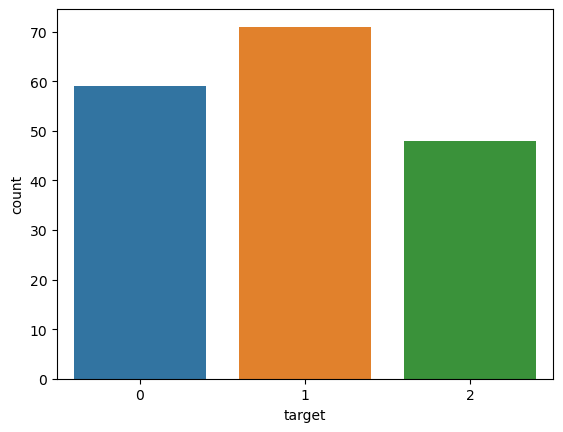

In [159]:
# Load the Wine dataset
wine = load_wine(as_frame=True)

print("X.shape: ",wine.data.shape, "y.shape: ", wine.target.shape)
print("feature names:", wine.feature_names)
print("target names:", wine.target_names)


# Feature information
wine.data.info()
# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=wine.target)
plt.show()

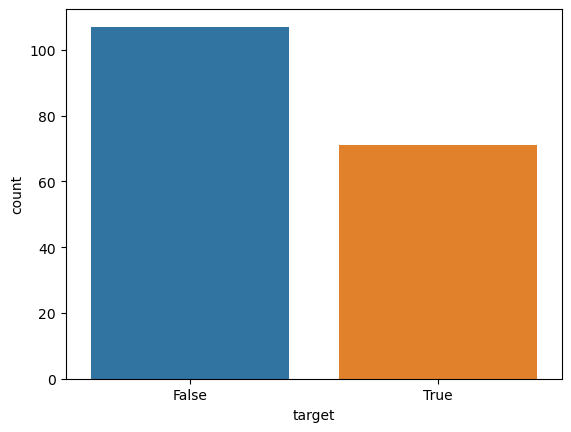

In [160]:
# For simplicity, we will only use first two features: alcohol and malic_acid
X = wine.data[['alcohol', 'malic_acid']].values
# For simplicity, we will only predict two wines: wine 1 and not wine 1
y = (wine.target == 1)  

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=y)
plt.show()

Accuracy: 0.9444444444444444


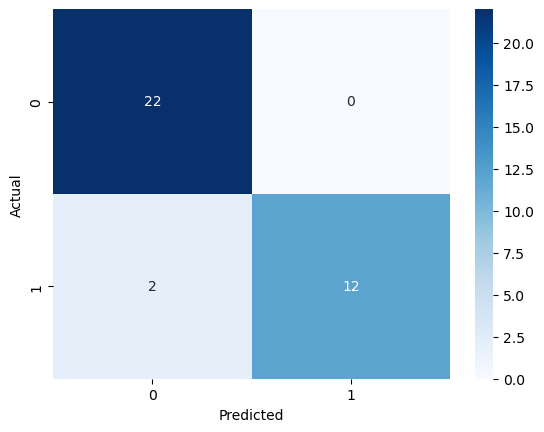

In [161]:
# Create a decision tree classifier with default hyperparameters
clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='gini')

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

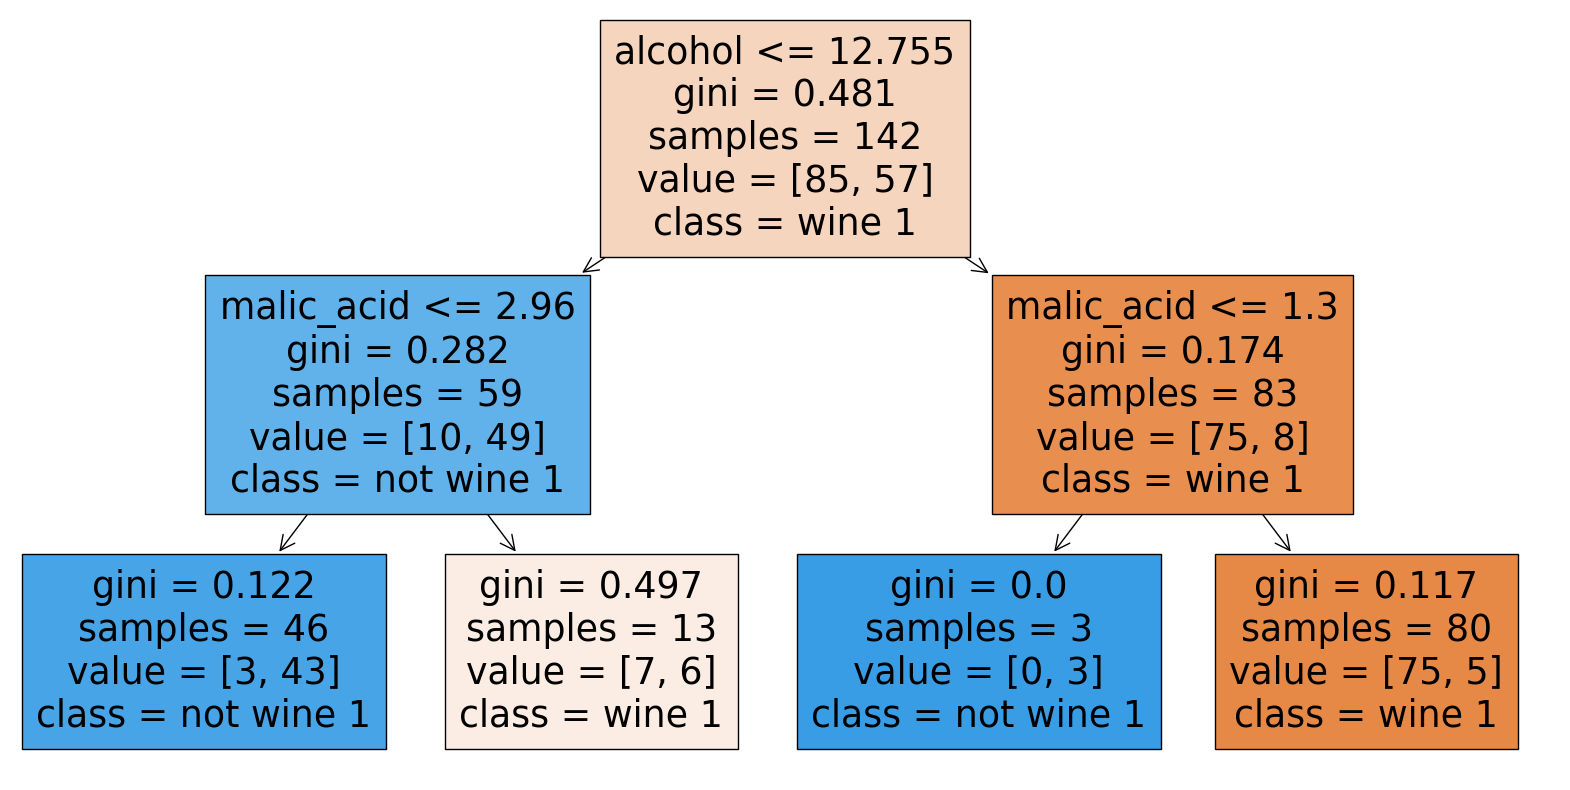

In [162]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['alcohol', 'malic_acid'], class_names=['wine 1', 'not wine 1'])
plt.show()


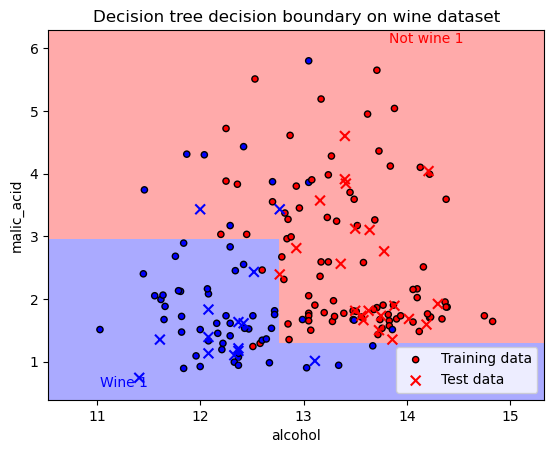

In [163]:
# Plot the decision boundary and the training and test data
# Define the step size for the meshgrid
h = 0.02  

# Define the minimum and maximum values for the x and y axes based on the training data
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5


# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions for the meshgrid points and reshape them into the meshgrid shape
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define two color maps for the scatter plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a new figure and axis object for the plot
fig, ax = plt.subplots()

# Plot the decision boundary as a color mesh using the light color map
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training data as circles using the bold color map
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label="Training data")

# Plot the test data as X marks using the bold color map
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=50, marker='x', label="Test data")

# Set the limits for the x and y axes to the minimum and maximum values of the meshgrid
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Set the labels for the x and y axes and the title for the plot

ax.set_xlabel('alcohol')
ax.set_ylabel('malic_acid')
ax.set_title('Decision tree decision boundary on wine dataset')
ax.legend(loc='lower right')
# Label the target information 
ax.text(xx.min() + 0.5, yy.min() + 0.2, "Wine 1", color="blue")
ax.text(xx.max() - 1.5, yy.max() - 0.2, "Not wine 1", color="red")
# Show the plot
plt.show()

### Use DecisionTreeRegressor() class provided by Scikit-Learn in dataset dataset

The California Housing dataset is a famous dataset that is commonly used for regression analysis. It contains information about the housing prices and other features of different districts in California, which include things like the latitude and longitude of each district, the median income, and the number of rooms in each house. The target variable is the median house value for each district. The California Housing dataset is often used to demonstrate various machine learning techniques and algorithms, such as linear regression, decision trees, and neural networks. 

To simplify the task, we will use only two features from the dataset: latitude and longitude to predict the median house value. The DecisionTreeRegressor class is provided by Scikit-Learn with the default MSE measure to evaluate the quality of a split. We will also set the max_depth hyperparameter to 10 to limit the depth of the decision tree to 10 levels. 

In [164]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

In [165]:
# Import the required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X.shape:  (20640, 8) y.shape:  (20640,)
features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


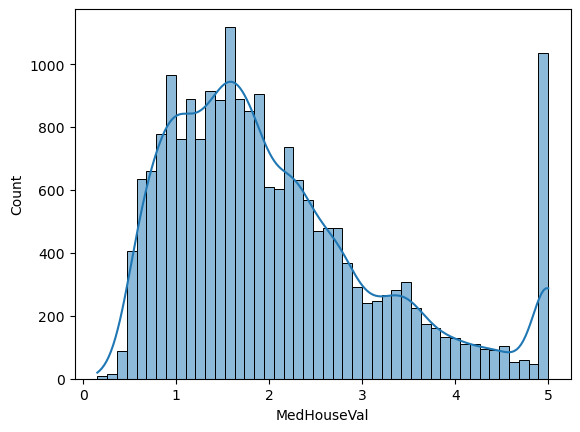

In [166]:
# Load the california housing dataset
dataset = fetch_california_housing(as_frame=True)

print("X.shape: ",dataset.data.shape, "y.shape: ", dataset.target.shape)
print("features:" , dataset.feature_names)

dataset.data.info()

# Visualize the distribution of the target variable using a histogram:
sns.histplot(dataset.target, kde=True)
plt.show()


In [167]:
# For simplicity, we will only use lattitude and longitude as features
X = dataset.data[['Latitude', 'Longitude']].values
y = dataset.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
reg = DecisionTreeRegressor(max_depth=10, random_state=42, criterion='squared_error')
reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg.predict(X_test)

# Evaluate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the R^2 score on the test data
r2 = r2_score(y_test, y_pred)
print("R2:", r2)


MSE: 0.4041988149984332
R2: 0.6915475842198273


The MSE value of 0.404 suggests that the average squared difference between the predicted and actual values is relatively small, indicating a good fit of the model to the data. The R2 score of 0.691 indicates that the model explains approximately 69% of the variance in the target variable. This means that the model has a moderate predictive power in terms of explaining the variability of the target variable in the test data. Compared to the [linear regression](./linear_regression.ipynb), Decision tree regressor uses only two features related to the location but has a higher R2 score and lower MSE value, indicating that it is a better model for predicting the median house value.

## Pros and Cons

**Pros:**

- Easy to understand, interpret, and visualize.
- Can handle both numerical and categorical data.
- Requires little data preprocessing (e.g., no need for scaling or normalization).
- Can be easily combined with other models to create ensemble methods (e.g., Random Forest, Gradient Boosting).

**Cons:**

- Prone to overfitting, especially when the tree is deep or has many leaves.
- Can be unstable, as small changes in the data may lead to completely different trees.
- May not perform well on datasets with complex relationships or high dimensionality.
- Can be computationally expensive for large datasets.

## Suitable Tasks and Datasets

Decision trees can be applied to a wide range of classification and regression tasks where the relationship between the input features and the target variable can be modeled using a tree-like structure. They are particularly suitable for the following:

- **Classification and Regression Tasks**: Decision trees can be used for both classification and regression tasks. They can handle binary and multi-class classification tasks as well as regression tasks where the target variable is continuous.

- **Numerical and Categorical Data**: Decision trees can handle both numerical and categorical data. They are particularly good at handling categorical variables with many levels that would require creating many dummy variables in other algorithms.

- **Feature Interactions**: Decision trees naturally capture interactions between variables. If the effect of one feature depends on the value of another feature, decision trees can model that interaction explicitly.

- **Non-linear Relationships**: Decision trees can model non-linear relationships and are not affected by scaling of the input features or target.

- **Large Datasets**: Decision trees can be used with large datasets, though training time may increase as the size of the dataset grows.

- **Imbalanced Datasets**: Decision trees can handle imbalanced datasets by adjusting the class weights.

- **Missing Values**: Some implementations of decision trees, such as those in the h2o and LightGBM libraries, can handle missing values without requiring pre-processing.


Here are some detailed examples of tasks where decision trees can be applied:

- Diagnosing diseases based on symptoms.
- Predicting customer churn.
- Determining the optimal marketing strategy for a product.

## References

1. Quinlan, J. R. (1986). Induction of decision trees. Machine learning, 1, 81-106.
2. Breiman, L. (2017). Classification and regression trees. Routledge.
3. Scikit-Learn: Decision Trees. https://scikit-learn.org/stable/modules/tree.html
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".